In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [2]:
df = pd.read_csv('clean_data.csv')

In [26]:
# Test different numbers of topics using coherence scores

# Initialize an empty list to store coherence scores
coherence_scores = []

# Test different numbers of topics (with a step of 5)
for num_topics in tqdm(range(5, 41, 5)):
    
    # Split the preprocessed text data into a list of words for each document
    documents = df["Lyric"].apply(lambda x: x.split())
    
    # Create a Gensim dictionary (word to ID mapping)
    dictionary = gensim.corpora.Dictionary(documents)
    
    # Create a Gensim corpus (a collection of bags of words for each document)
    corpus = [dictionary.doc2bow(doc) for doc in documents]

    # Train an LDA model using Gensim
    lsi_model = gensim.models.LsiModel(corpus, num_topics=num_topics, id2word=dictionary)
    
    # Calculate the coherence score for the current model
    coherence_model = CoherenceModel(model=lsi_model, texts=documents, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    
    # Append the coherence score to the list
    coherence_scores.append(coherence_score)

# Print the list of coherence scores
print("Coherence Scores:", coherence_scores)

100%|██████████| 8/8 [37:37<00:00, 282.19s/it]

Coherence Scores: [0.35246873230652565, 0.35500234459785573, 0.35137421107584477, 0.3495751757956127, 0.33836299918090257, 0.3378571000277724, 0.32984600023297433, 0.326137592832659]


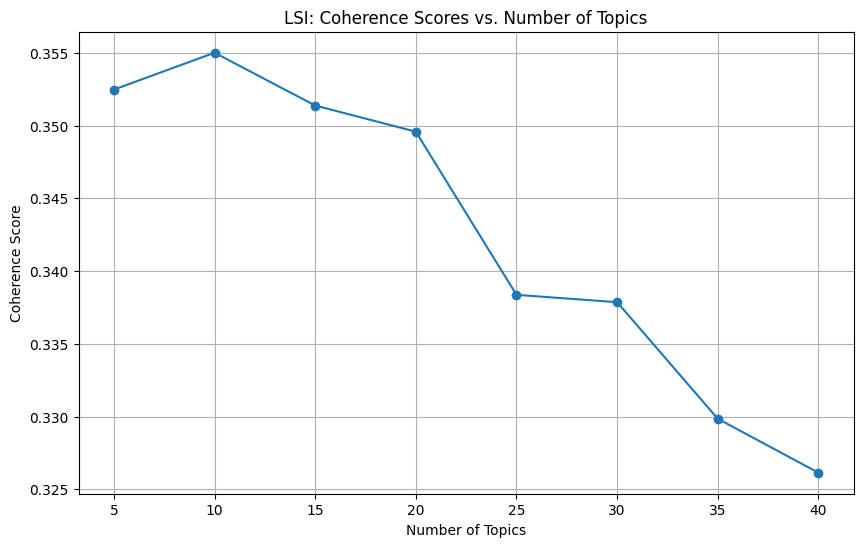

In [27]:
# Test and plot different numbers of topics
num_topics_range = range(5, 41, 5)

plt.figure(figsize=(10, 6))
plt.plot(num_topics_range, coherence_scores, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("LSI: Coherence Scores vs. Number of Topics")
plt.grid(True)
plt.show()

In [31]:
# Apply LSI using 10 topics 
# Apply Count Vectorization
vectorizer = CountVectorizer()
data_vectorized = vectorizer.fit_transform(df["Lyric"])

In [32]:
# Apply LSI
num_topics = 10 
# Latent Semantic Indexing Model using Truncated SVD
lsi = TruncatedSVD(n_components=num_topics)
data_lsi = lsi.fit_transform(data_vectorized)

In [33]:
# Print the top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lsi.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-20 - 1:-1]]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

Topic #1: love, know, get, go, come, let, want, time, baby, feel, way, tell, girl, need, think, right, wanna, good, life, look
Topic #2: love, heart, baby, fall, true, sweet, doo, forever, la, kiss, touch, babe, lover, sucker, need, romance, hurt, share, darling, tender
Topic #3: know, feel, want, heart, think, away, find, cry, lie, believe, tell, dream, fall, hurt, thing, eye, true, wish, change, try
Topic #4: come, go, let, time, feel, night, day, away, life, baby, way, heart, light, world, home, long, tonight, dream, find, leave
Topic #5: go, time, day, way, away, life, find, think, long, leave, live, heart, try, lose, night, die, run, change, get, say
Topic #6: come, know, get, love, home, nigga, shit, man, bitch, fuck, run, money, day, sun, town, true, well, alive, soon, street
Topic #7: want, baby, girl, need, wanna, tell, bad, think, little, feel, like, boy, man, say, thing, body, look, kiss, pretty, crazy
Topic #8: baby, go, girl, let, know, come, get, shake, wanna, rock, dance

In [87]:
# Write the top words for each topic into a txt file
output_file_path = "lsi_top_words_per_topic_without_weights.txt"
with open(output_file_path, "w") as file:
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lsi.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-20 - 1:-1]]
        file.write(f"Topic #{topic_idx + 1}: {', '.join(top_words)}\n")

In [ ]:
# Print the top words for each topic and their weights
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lsi.components_):
    top_words_with_weights = [(feature_names[i], topic[i]) for i in topic.argsort()[:-20 - 1:-1]]
    print(f"Topic #{topic_idx + 1}:")
    for word, weight in top_words_with_weights:
        print(f"{word} ({round(weight, 3)})", end=", ")
    print()

In [86]:
# Write the top words and thier weights into a txt file
output_file_path = "lsi_top_words_per_topic_with_weights.txt"
with open(output_file_path, "w") as file:
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lsi.components_):
        top_words_with_weights = [(feature_names[i], topic[i]) for i in topic.argsort()[:-20 - 1:-1]]
        file.write(f"Topic #{topic_idx + 1}:\n")
        file.write(", ".join([f"{word} ({round(weight, 3)})" for word, weight in top_words_with_weights]))
        file.write("\n")

In [88]:
# Plot top words 
def plot_top_words(model, feature_names, n_top_words=10):
  fig, axes = plt.subplots(2, 5, figsize=(40, 18), sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="major", labelsize=25)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)
    fig.suptitle('LSI: Top Words', fontsize=40)

  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.80, hspace=0.2)
  plt.show()

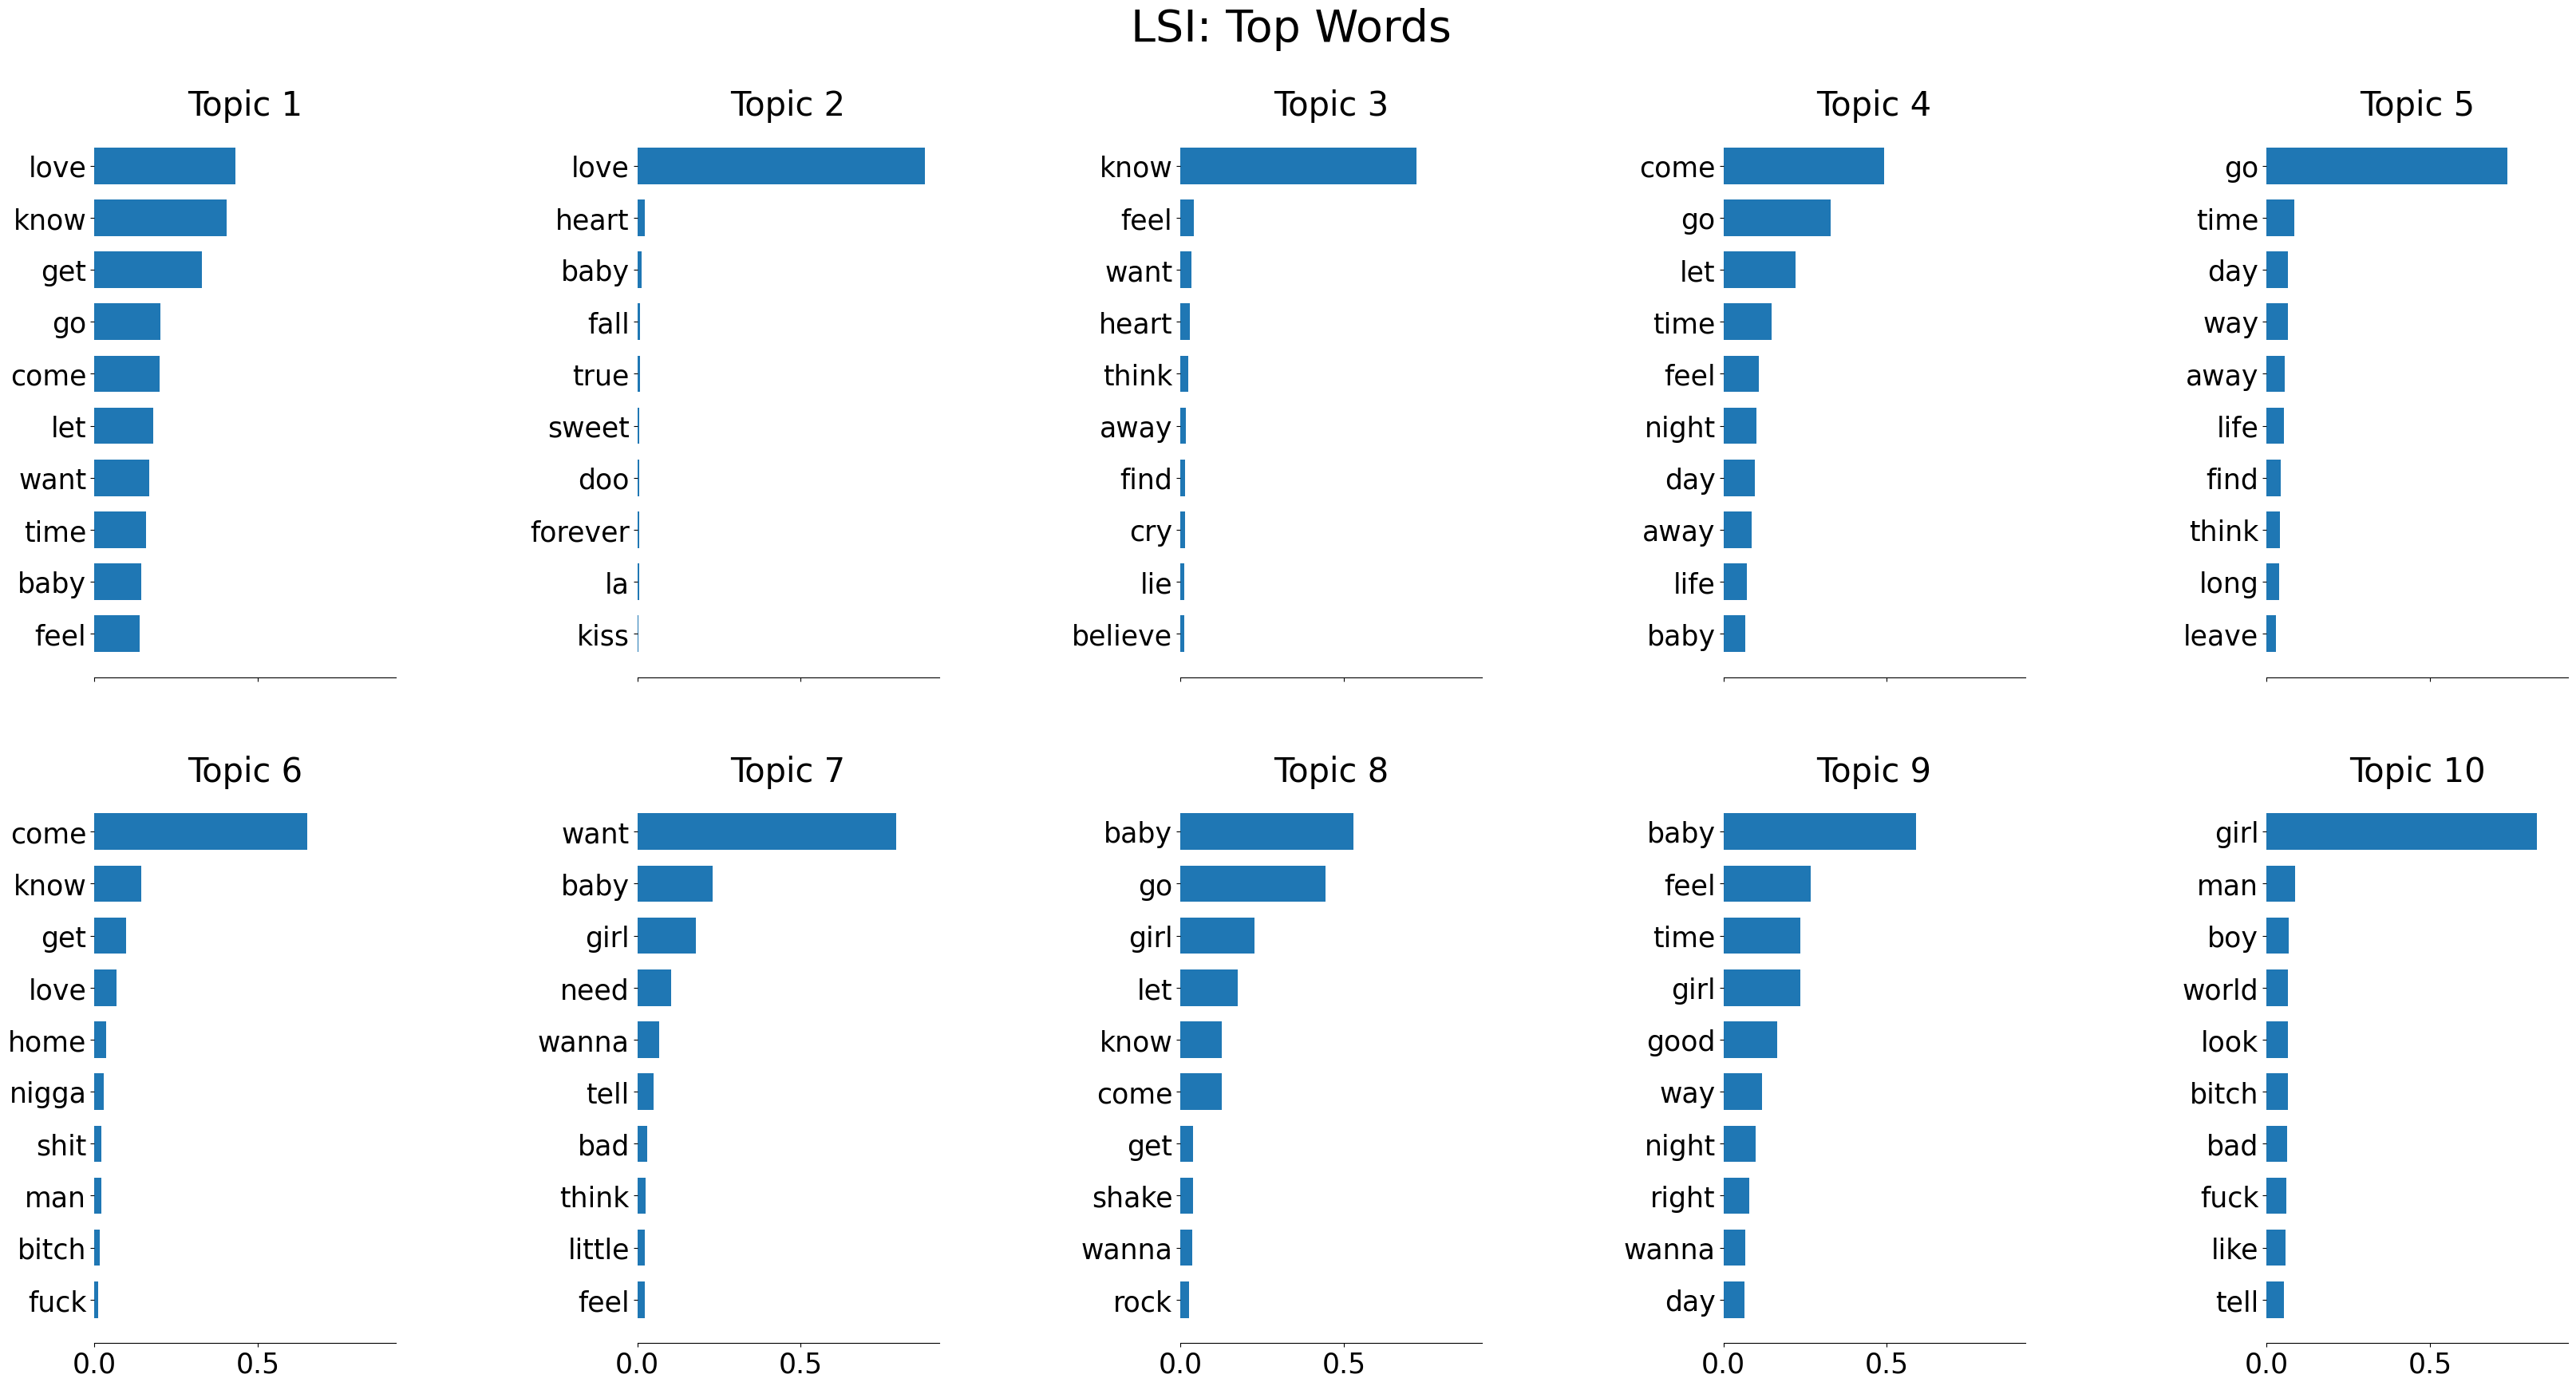

In [89]:
feature_names = vectorizer.get_feature_names_out()
plot_top_words(lsi, feature_names)